<a href="https://colab.research.google.com/github/RyomaBF/CAP4630/blob/master/HW2part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import matplotlib.pyplot as plt
import numpy as np

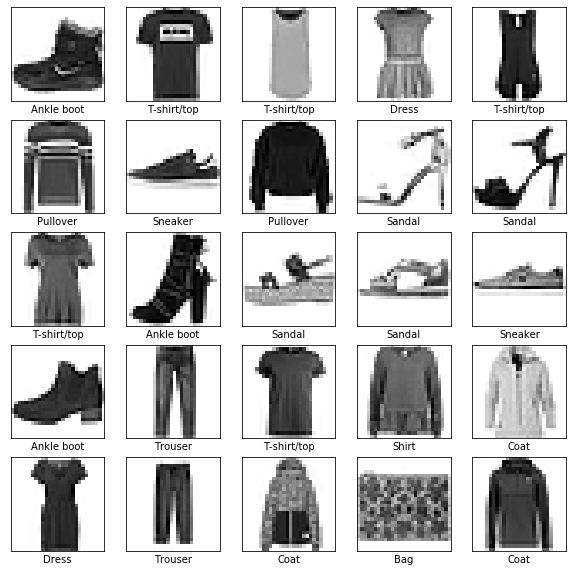

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

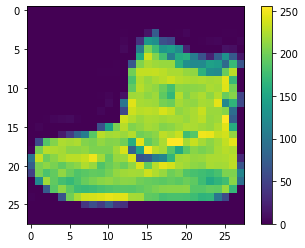

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

This below is an example of underfitting. As you can see, after flattening only softmax is used. This is simply far to simple to properly train.

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.6017 - acc: 0.7971 - val_loss: 0.5085 - val_acc: 0.8268
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4606 - acc: 0.8434 - val_loss: 0.4888 - val_acc: 0.8318
Epoch 3/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4348 - acc: 0.8496 - val_loss: 0.4619 - val_acc: 0.8416
Epoch 4/20
60000/60000 [==============================] - 3s 46us/sample - loss: 0.4216 - acc: 0.8543 - val_loss: 0.4618 - val_acc: 0.8369
Epoch 5/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4127 - acc: 0.8570 - val_loss: 0.4494 - val_acc: 0.8445
Epoch 6/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4061 - acc: 0.8604 - val_loss: 0.4476 - val_acc: 0.8412
Epoch 7/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4020 - acc: 0.8602 - val_loss: 0.

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.4439 - acc: 0.8463
Test accuracy: 0.8463


I have used the notebook online as the basis, and the test accuracy from the notebook is .885. We have lost about 4% accuracy here. 

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

As the graphs below represent, our test loss does not get any better after the 10th epoch.

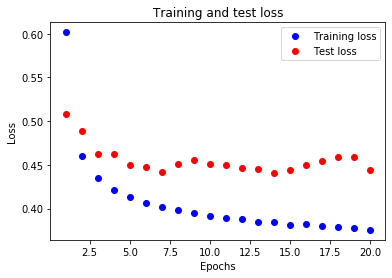

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

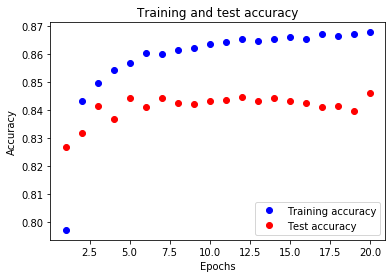

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Below is an example of overfitting

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('float64')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import matplotlib.pyplot as plt
import numpy as np

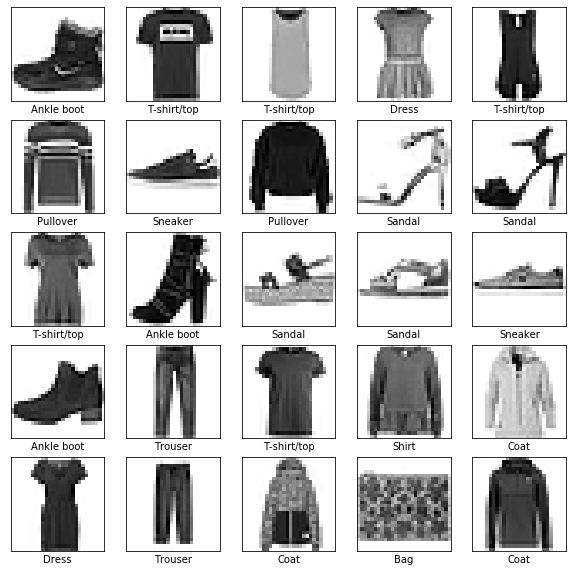

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

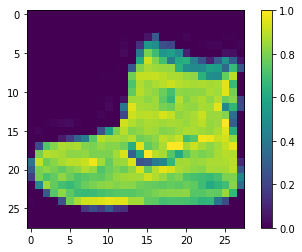

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

As you can see, there are many layers and no dropouts

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(128*2, activation=tf.nn.leaky_relu),
    keras.layers.Dense(128*4, activation=tf.nn.sigmoid),
    keras.layers.Dense(128*4, activation=tf.nn.leaky_relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 279us/sample - loss: 1.1541 - acc: 0.5305 - val_loss: 0.7978 - val_acc: 0.6861
Epoch 2/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.7328 - acc: 0.7195 - val_loss: 0.8069 - val_acc: 0.6974
Epoch 3/20
60000/60000 [==============================] - 17s 282us/sample - loss: 0.6799 - acc: 0.7423 - val_loss: 0.6571 - val_acc: 0.7532
Epoch 4/20
60000/60000 [==============================] - 16s 272us/sample - loss: 0.6451 - acc: 0.7568 - val_loss: 0.6693 - val_acc: 0.7283
Epoch 5/20
60000/60000 [==============================] - 17s 275us/sample - loss: 0.6152 - acc: 0.7697 - val_loss: 0.6493 - val_acc: 0.7654
Epoch 6/20
60000/60000 [==============================] - 16s 274us/sample - loss: 0.5936 - acc: 0.7788 - val_loss: 0.6069 - val_acc: 0.7758
Epoch 7/20
60000/60000 [==============================] - 16s 270us/sample - loss: 0.5631 - acc: 0.7928 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.4532 - acc: 0.8372
Test accuracy: 0.8372


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

We can see that even though we did more training, the accuracy had gone down than before. The graphs show that the test loss is fluctuating, showing that it is too reliant on the training and does not give us a good prediction.

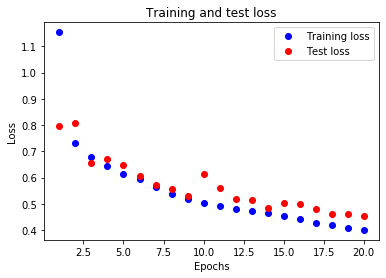

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

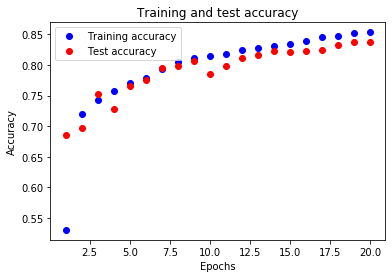

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
import matplotlib.pyplot as plt
import numpy as np

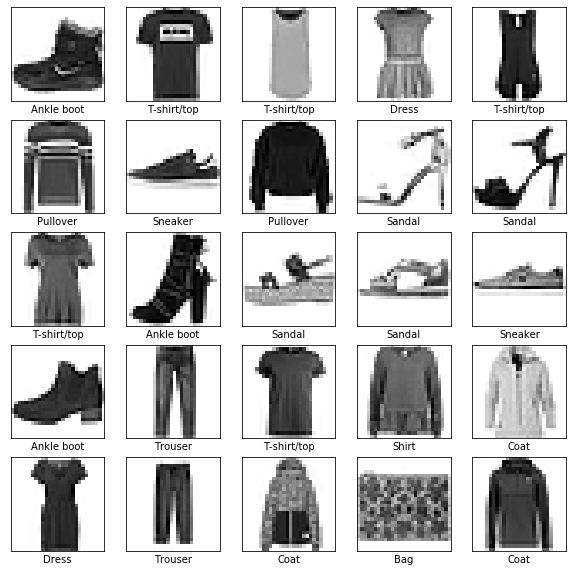

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128*2, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/sample - loss: 0.5934 - acc: 0.7811 - val_loss: 0.4574 - val_acc: 0.8323
Epoch 2/20
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4614 - acc: 0.8264 - val_loss: 0.4013 - val_acc: 0.8502
Epoch 3/20
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4281 - acc: 0.8394 - val_loss: 0.3866 - val_acc: 0.8562
Epoch 4/20
60000/60000 [==============================] - 7s 119us/sample - loss: 0.4080 - acc: 0.8459 - val_loss: 0.3903 - val_acc: 0.8538
Epoch 5/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3949 - acc: 0.8519 - val_loss: 0.3600 - val_acc: 0.8666
Epoch 6/20
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3829 - acc: 0.8552 - val_loss: 0.3577 - val_acc: 0.8651
Epoch 7/20
60000/60000 [==============================] - 7s 117us/sample - loss: 0.3733 - acc: 0.8586 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 0.3223 - acc: 0.8812
Test accuracy: 0.8812


In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

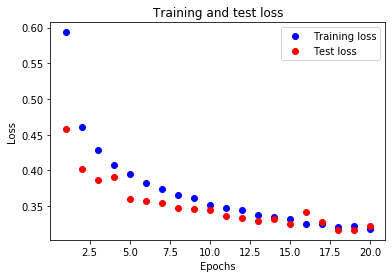

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

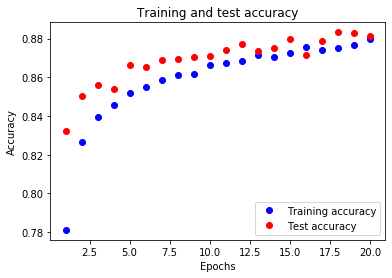

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As the graphs show, there are fluctuations but the data accuracy is better at 88%, and this training was pretty good.